# Machine Learning

# Regression

Utilitzarem la base de dades Iris, que ens proporciona un Data Set sobre tipus de plantes i els seus pètals

In [1]:
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

diabetes = datasets.load_diabetes()

In [2]:
import pandas as panda
import numpy as np

df = panda.DataFrame(diabetes.data,columns=diabetes.feature_names)
df['Progression'] = diabetes.target

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [3]:
df.dtypes

age            float64
sex            float64
bmi            float64
bp             float64
s1             float64
s2             float64
s3             float64
s4             float64
s5             float64
s6             float64
Progression    float64
dtype: object

In [4]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

<Figure size 432x288 with 0 Axes>

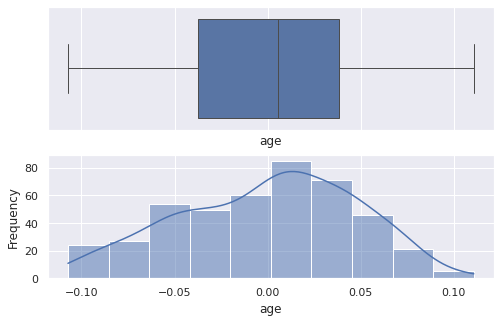

<Figure size 576x360 with 0 Axes>

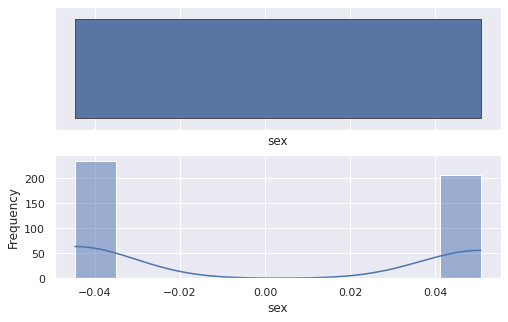

<Figure size 576x360 with 0 Axes>

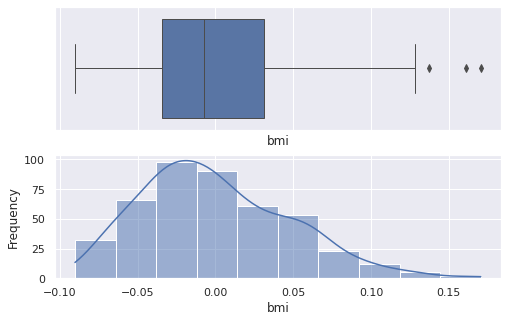

<Figure size 576x360 with 0 Axes>

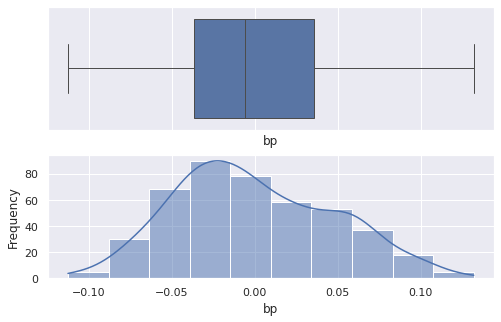

<Figure size 576x360 with 0 Axes>

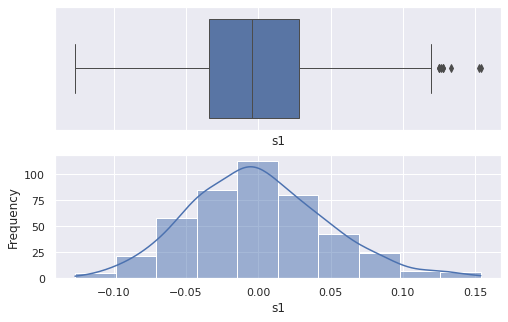

<Figure size 576x360 with 0 Axes>

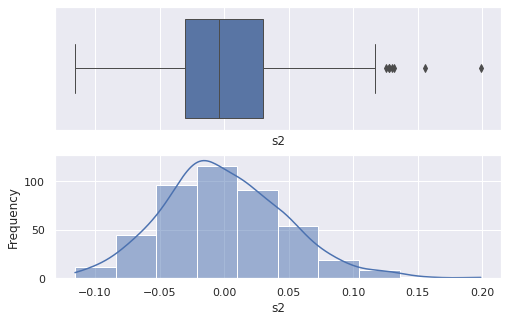

<Figure size 576x360 with 0 Axes>

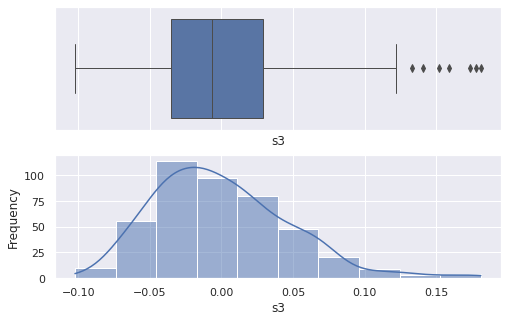

<Figure size 576x360 with 0 Axes>

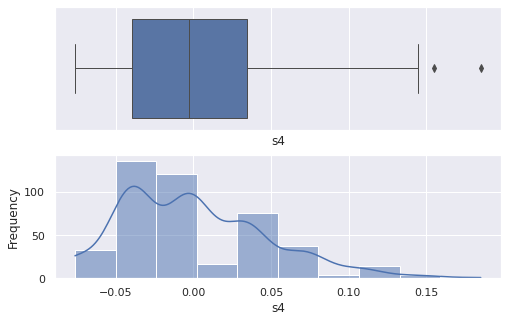

<Figure size 576x360 with 0 Axes>

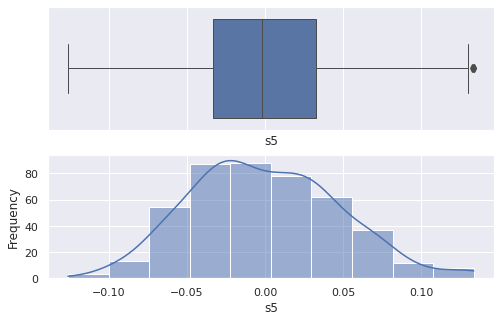

<Figure size 576x360 with 0 Axes>

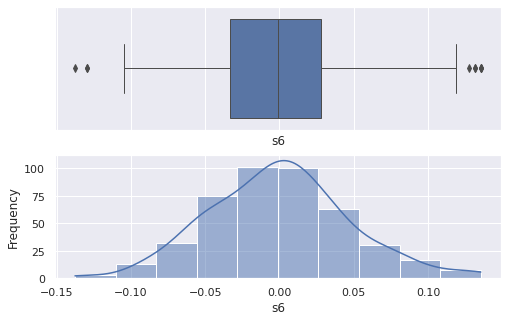

<Figure size 576x360 with 0 Axes>

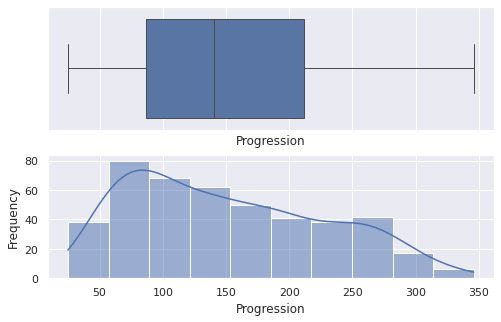

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

for i in df.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i],  ax=ax_box , linewidth= 1.0)
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True)

<AxesSubplot:>

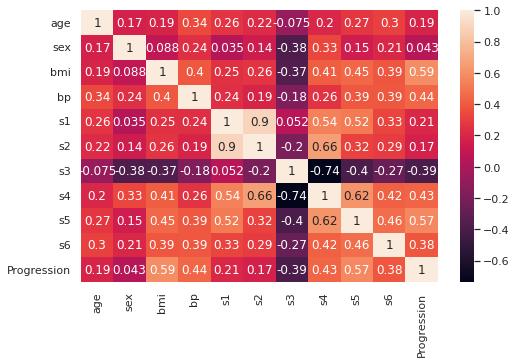

In [6]:
corr = df.corr()
sns.heatmap(corr, annot=True)

## 2 Preprocessat

In [7]:
df.isnull().values.any()

False

In [8]:
df.isna().values.any()

False

> No tenim valors nuls i considerem que no existeixen dades anomeles

#### Hipotesis per determinar si Sepal width i sepal length tenen distribució normal [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html)

In [9]:
from scipy import stats

print('Hipotesis nula Ho -> La mostra té una distribució normal')
print('Hipotesis alternativa H1 -> La mostra no té una distribució normal\n\n')

for i in df.columns:
    shapiro_test = stats.shapiro(df[i])
    print('Per la variable ', i, "amb un p-value de ", shapiro_test.pvalue)
    if shapiro_test.pvalue>0.05:
        print('No podem rebutjar hipotesis nula\n')
    else:
        print("Podem rebutjar l'hipotesis nula\n")

Hipotesis nula Ho -> La mostra té una distribució normal
Hipotesis alternativa H1 -> La mostra no té una distribució normal


Per la variable  age amb un p-value de  3.279272641520947e-05
Podem rebutjar l'hipotesis nula

Per la variable  sex amb un p-value de  1.3974469435569793e-29
Podem rebutjar l'hipotesis nula

Per la variable  bmi amb un p-value de  2.5203468112522387e-07
Podem rebutjar l'hipotesis nula

Per la variable  bp amb un p-value de  7.134854240575805e-05
Podem rebutjar l'hipotesis nula

Per la variable  s1 amb un p-value de  0.005133358296006918
Podem rebutjar l'hipotesis nula

Per la variable  s2 amb un p-value de  0.0013085443060845137
Podem rebutjar l'hipotesis nula

Per la variable  s3 amb un p-value de  4.433043265805736e-09
Podem rebutjar l'hipotesis nula

Per la variable  s4 amb un p-value de  3.2725287323759344e-14
Podem rebutjar l'hipotesis nula

Per la variable  s5 amb un p-value de  0.009548770263791084
Podem rebutjar l'hipotesis nula

Per la variable  s6 amb 

> - La distribució de s6 podem arribar-la a considerar Normal, totes les que presenten outliers, aplicarem directament sobre X, RobustScaler. Les altres farem una normalització

In [11]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

columnsNorm = ['age', 'sex',  'bp']
scaler = preprocessing.MinMaxScaler().fit(df[columnsNorm])
df[columnsNorm] = scaler.transform(df[columnsNorm])

columnsRobust = ['bmi', 's1', 's2', 's3', 's4', 's5', 's6']
scaler = preprocessing.RobustScaler().fit(df[columnsRobust])
df[columnsRobust] = scaler.transform(df[columnsRobust])

<Figure size 576x360 with 0 Axes>

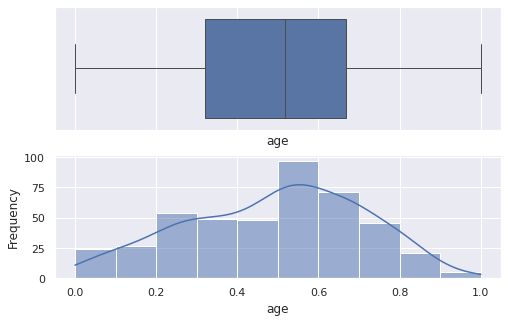

<Figure size 576x360 with 0 Axes>

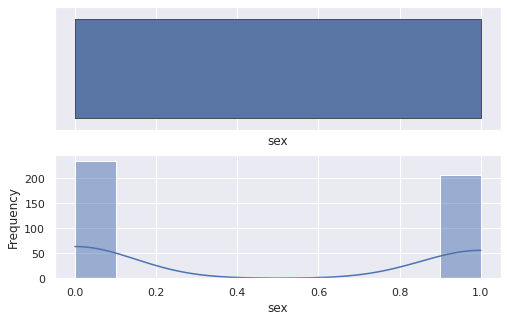

<Figure size 576x360 with 0 Axes>

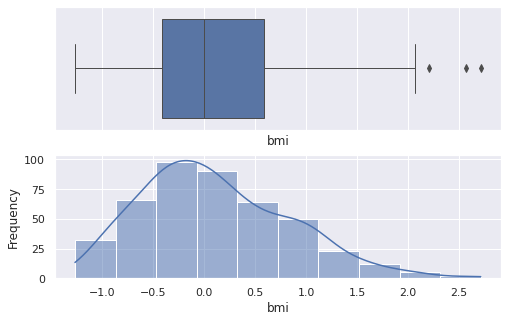

<Figure size 576x360 with 0 Axes>

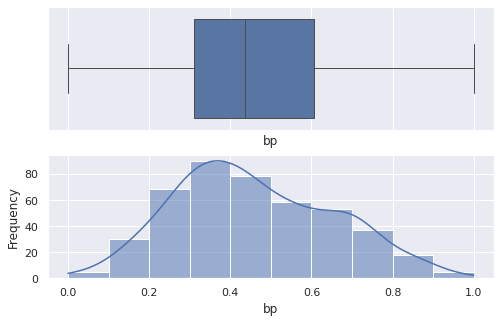

<Figure size 576x360 with 0 Axes>

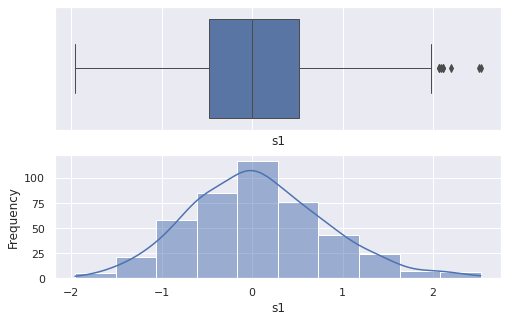

<Figure size 576x360 with 0 Axes>

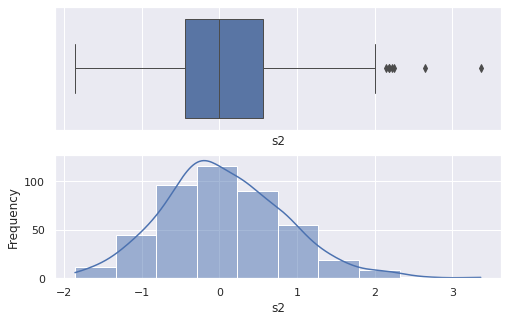

<Figure size 576x360 with 0 Axes>

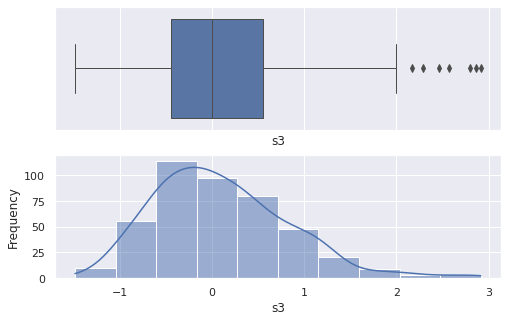

<Figure size 576x360 with 0 Axes>

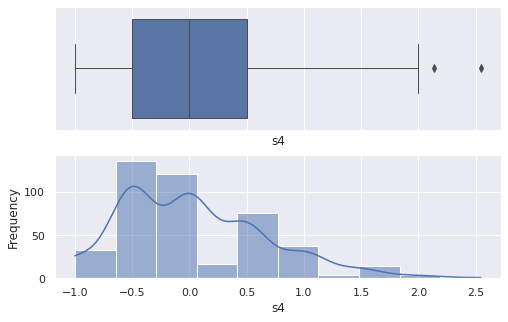

<Figure size 576x360 with 0 Axes>

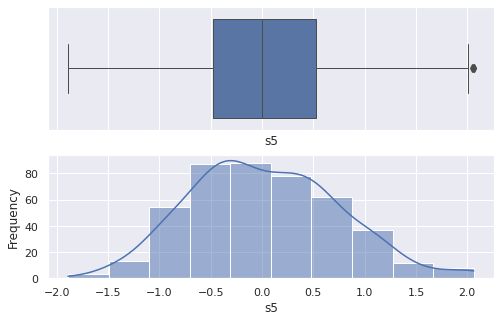

<Figure size 576x360 with 0 Axes>

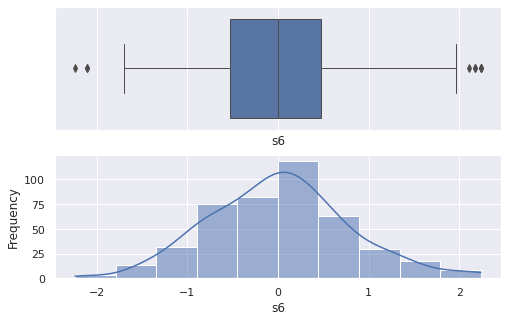

<Figure size 576x360 with 0 Axes>

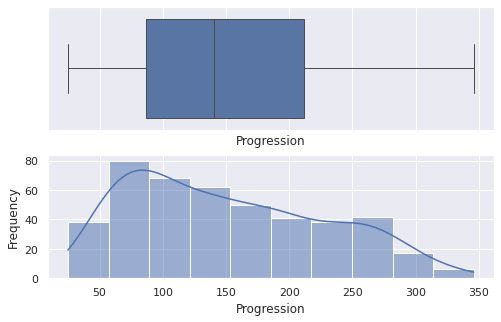

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

for i in df.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i],  ax=ax_box , linewidth= 1.0)
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True)

## 3 Test/train

In [13]:
from sklearn.model_selection import train_test_split

X = df.drop(['Progression'],axis=1)
y = df['Progression']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

## 4 Models

In [14]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [15]:
from sklearn.svm import SVR
svr = SVR()

#### Training the models

In [16]:
lr.fit(X_train, y_train)
svr.fit(X_train, y_train)

SVR()

In [17]:
y_pred_lr = lr.predict(X_test)
y_pred_svr = svr.predict(X_test)

In [18]:
y_pred_lr[1:5]

array([ 57.80011777,  95.40506714, 234.56561578, 174.57118435])

## 5 Evaluació

In [19]:
from sklearn.metrics import r2_score

r2_lr = r2_score(y_test, y_pred_lr)
r2_svr = r2_score(y_test, y_pred_svr)

In [20]:
from sklearn.metrics import mean_squared_error

mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_svr = mean_squared_error(y_test, y_pred_svr)

In [21]:
metrics = panda.DataFrame( data = [['Linear Regression', r2_lr, mse_lr],
                                  ['Support Vector Machines', r2_svr, mse_svr]],
                                  columns = ['Model', 'R2', 'MSE'])
metrics.head()

,Model,R2,MSE
0,Linear Regression,0.517473,2865.456785
1,Support Vector Machines,0.149211,5052.361338


### Cross Validation

In [22]:
from sklearn.model_selection import cross_val_score

cv_lr = cross_val_score(lr, X, y, cv=5, scoring='r2')
cv_svr = cross_val_score(svr, X, y, cv=5, scoring='r2')

In [23]:
cv_lr_mean = [cv_lr.mean(), cv_svr.mean()]
metrics['R2 with CV'] = cv_lr_mean
metrics.head()

,Model,R2,MSE,R2 with CV
0,Linear Regression,0.517473,2865.456785,0.482316
1,Support Vector Machines,0.149211,5052.361338,0.161335


## 6. Millors paràmetres

In [24]:
from sklearn.model_selection import RandomizedSearchCV
param = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),'C' : [1,5,10],'degree' : [3,8],
         'coef0' : [0.01,10,0.5],'gamma' : ('auto','scale')},
rsearch = RandomizedSearchCV(estimator=svr,
                             param_distributions=param,cv=5,
                             n_iter=10,random_state=42,scoring='r2')
rsearch.fit(X, y)
print(rsearch.best_score_)
print(rsearch.best_params_)

0.47480829897832244
{'kernel': 'linear', 'gamma': 'scale', 'degree': 3, 'coef0': 0.5, 'C': 10}


In [25]:
svr_bp = SVR(kernel='linear', gamma='scale',degree= 3,coef0= 0.5,C= 10).fit(X_train, y_train)
y_pred_svr_bp = svr_bp.predict(X_test)

In [26]:
metrics_bp = panda.DataFrame( data = [['SVR best params', r2_score(y_test, y_pred_svr_bp),
                         mean_squared_error(y_test, y_pred_svr_bp),
                         cross_val_score(svr_bp, X, y, cv=5, scoring='r2').mean()]],
                                  columns = ['Model', 'R2', 'MSE', 'R2 with CV'])

metrics = metrics.append(metrics_bp, ignore_index=True)

In [27]:
metrics.head()

,Model,R2,MSE,R2 with CV
0,Linear Regression,0.517473,2865.456785,0.482316
1,Support Vector Machines,0.149211,5052.361338,0.161335
2,SVR best params,0.490946,3022.987745,0.474808


In [28]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=100, random_state=0)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
r2_score(y_test, y_pred_rf)

0.4440202422311479